In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
trump = pd.read_csv("./dataset/US_selection_sentiment_analysis/hashtag_donaldtrump.csv", engine='python')
biden = pd.read_csv("./dataset/US_selection_sentiment_analysis/hashtag_joebiden.csv", engine='python')

In [3]:
print(trump.columns)
print(biden.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')
Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [4]:
print(trump.shape)
print(biden.shape)

(971087, 21)
(777073, 21)


In [5]:
print(trump.info)
print(biden.info)

<bound method DataFrame.info of                  created_at                tweet_id  \
0       2020-10-15 00:00:01   1.316529221557252e+18   
1       2020-10-15 00:00:01  1.3165292227484303e+18   
2       2020-10-15 00:00:02   1.316529228091847e+18   
3       2020-10-15 00:00:02   1.316529227471237e+18   
4       2020-10-15 00:00:08  1.3165292523014513e+18   
...                     ...                     ...   
971082  2020-11-08 23:59:43  1.3255888434882765e+18   
971083  2020-11-08 23:59:48  1.3255888660451942e+18   
971084  2020-11-08 23:59:53  1.3255888855152271e+18   
971085  2020-11-08 23:59:54  1.3255888929054024e+18   
971086  2020-11-08 23:59:55  1.3255888944825344e+18   

                                                    tweet  likes  \
0       #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0   
1       Usa 2020, Trump contro Facebook e Twitter: cop...   26.0   
2       #Trump: As a student I used to hear for years,...    2.0   
3       2 hours since last tweet fr

## Data Cleaning

In [3]:
# Merging Two Dataset for better handling
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'

data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1748160, 22)

First 2 rows:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgc

In [4]:
#Checking NUll values
data.isnull().sum()

# Dropping all the null values
data.dropna(inplace=True) 

# #Checking again for NUll values
# data.isnull().sum()

In [5]:
data['country'].value_counts

<bound method IndexOpsMixin.value_counts of 2         United States of America
4         United States of America
11        United States of America
12        United States of America
13                  United Kingdom
                    ...           
777047                  Bangladesh
777048    United States of America
777052    United States of America
777056                      Mexico
777063                 New Zealand
Name: country, Length: 345212, dtype: object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345212 entries, 2 to 777063
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            345212 non-null  object 
 1   tweet_id              345212 non-null  object 
 2   tweet                 345212 non-null  object 
 3   likes                 345212 non-null  object 
 4   retweet_count         345212 non-null  float64
 5   source                345212 non-null  object 
 6   user_id               345212 non-null  object 
 7   user_name             345212 non-null  object 
 8   user_screen_name      345212 non-null  object 
 9   user_description      345212 non-null  object 
 10  user_join_date        345212 non-null  object 
 11  user_followers_count  345212 non-null  object 
 12  user_location         345212 non-null  object 
 13  lat                   345212 non-null  object 
 14  long                  345212 non-null  object 
 15  city 

In [7]:
# Clean data
data['country'] = data['country'].replace({'United States': 'United States of America'})


# Remove unneeded columns
data = data.drop(columns=['tweet_id','user_id','user_name','user_screen_name',
                                  'user_description','user_join_date','collected_at', ])

# Renaming the 
data = data.rename(columns={"retweet_count":"Retweets", "state":"State", "user_followers_count": "Followers"})

# Remember to turn necessary columns to integer data columns
data['Retweets'] = pd.to_numeric(data['Retweets'], errors='coerce')  
data['likes'] = pd.to_numeric(data['likes'], errors='coerce') 


## Exploratory Data Analysis

In [8]:
# First, we can group the data by 'candidate' and check see whether which representative has more tweet than the other
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

# Bar Chart
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
color_discrete_map = {'Trump':'pink', 'Biden':'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates') 

# Show the chart
fig.show()

In [9]:
# Second we can check whether the candidates tweets likes count and based on the likes can have a initial prediction
# Interactive bar chart 
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index() 
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate', 
color_discrete_map={'Trump': 'blue', 'Biden': 'green'}, 
labels={'candidate': 'Candidate', 'likes': 'Total Likes'}, 
title='Comparison of Likes') 

# Update the layout with a black theme 
fig.update_layout(plot_bgcolor='black', 
paper_bgcolor='black', font_color='white') 

# Show the chart 
fig.show() 

In [10]:
# Next, we will look through which country is actively tweeting during the elections
top10countries = data.groupby('country')['tweet'].count( 
).sort_values(ascending=False).reset_index().head(10) 
# top10countries 

# Interactive bar chart 
fig = px.bar(top10countries, x='country', y='tweet', 
template='plotly_dark', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 Countrywise tweets Counts') 

# To view the graph 
fig.show() 

## Sentiment Analysis Cleaning

In [11]:
def clean_tweet_text_regex(tweet):
    tweet = tweet.lower() # to lower case
    tweet = re.sub(r'https?://\S+|www\.\S+', '', str(tweet)) # Remove URLs
    tweet = re.sub(r"@[A-Za-z0-9]+","", tweet) # Remove @Mentions
    tweet = re.sub(r"#","", tweet) # remove # \ART[\s]+
    tweet = re.sub(r"\ART[\s]+","", tweet) # Remove RT in start
    tweet = re.sub(r"https?:\/\/\S+","", tweet) # Remove hyperlink
    tweet = re.sub("(.)\\1{2,}","\\1", tweet) # Remove more than one characters.
    tweet = re.sub(r"[^A-Za-z0-9\s]+", "",str(tweet)) #remove special characters "!"
    

    # Split the tweet into single words 
    tweet = tweet.split() 

	# Initialize WordNetLemmatizer 
    lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
    tweet = [lm.lemmatize(word) for word in tweet if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
    tweet = ' '.join(word for word in tweet)
    
    return tweet

## Trump Sentiment Analysis

In [12]:
trump_tweets_roberta = data[data['candidate'] == 'trump']
trump_tweets_vader = data[data['candidate'] == 'trump']

# taking only U.S. country data 
trump_tweets_roberta = trump_tweets_roberta.loc[trump_tweets_roberta.country == 'United States of America'] 
trump_tweets_roberta= trump_tweets_roberta[['tweet']] 
print(trump_tweets_roberta.head()) 

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


### RoBERTa-3 Labels

In [13]:
trump_tweets_roberta['cleantext'] = trump_tweets_roberta['tweet'].apply(clean_tweet_text_regex) 
print(trump_tweets_roberta.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  2020 nypost censorship censored twitter manipu...  
12  trump presidenttrump trump2020landslidevictory...  
22  trump nobody like tell farmer better way worki...  


In [14]:
from transformers import pipeline

bert3_pipe = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment"
)

batch_size = 64
roberta_labels = []
for i in range(0, len(trump_tweets_roberta), batch_size):
    batch_texts = trump_tweets_roberta["cleantext"].iloc[i : i + batch_size].tolist()
    batch_out = bert3_pipe(batch_texts)
    roberta_labels.extend([r["label"] for r in batch_out])

trump_tweets_roberta["roberta3_label"] = roberta_labels 

label_map = {"LABEL_0": "negative", "LABEL_1": "neutral", "LABEL_2": "positive"}
trump_tweets_roberta["roberta3_label"] = trump_tweets_roberta["roberta3_label"].map(label_map )

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [15]:
print(list(trump_tweets_roberta["roberta3_label"].unique()))

['neutral', 'negative', 'positive']


In [16]:
trump_tweets_roberta["roberta3_label"].value_counts()

roberta3_label
neutral     49673
negative    41757
positive     5191
Name: count, dtype: int64

In [18]:
trump_tweets_roberta.to_csv("trump_roberta.csv", index=False)

### Overview of the label (Trump)

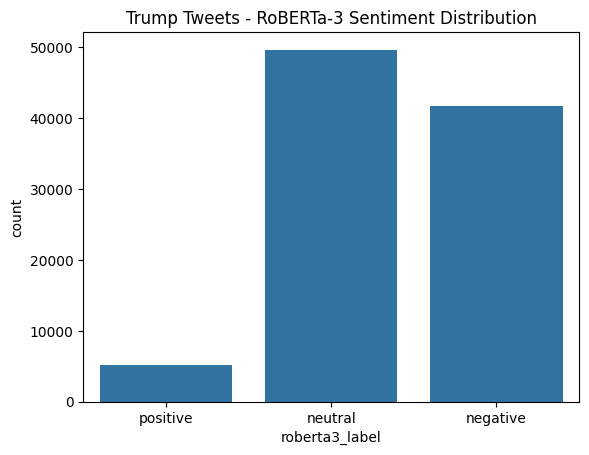

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_order = ['positive', 'neutral', 'negative']

trump_tweets_roberta['roberta3_label'] = pd.Categorical(trump_tweets_roberta['roberta3_label'], categories=sentiment_order, ordered=True)

sns.countplot(x='roberta3_label', data=trump_tweets_roberta, order = sentiment_order)
plt.title("Trump Tweets - RoBERTa-3 Sentiment Distribution")
plt.show()

## Biden Sentiment Analysis

In [19]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'United States of America'] 
biden_tweets = biden_tweets[['tweet']] 

In [20]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean_tweet_text_regex) 
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",2020 nypost censorship censored twitter manipu...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,bidencrimefamily joebiden hunterbiden hunterbi...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come please right thing move biden town hall b...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


###  roberta3

In [21]:
# 2) Run it in batches over your cleaned `df_all["text"]`
batch_size = 64
roberta_labels = []
for i in range(0, len(biden_tweets ), batch_size):
    batch_texts = biden_tweets["cleantext"].iloc[i : i + batch_size].tolist()
    batch_out = bert3_pipe(batch_texts)
    roberta_labels.extend([r["label"] for r in batch_out])

biden_tweets["roberta3_label"] = roberta_labels  

In [22]:
label_map = {"LABEL_0": "negative", "LABEL_1": "neutral", "LABEL_2": "positive"}
biden_tweets["roberta3_label"] = biden_tweets["roberta3_label"].map(label_map)

In [23]:
biden_tweets["roberta3_label"].value_counts()

roberta3_label
neutral     57201
negative    18485
positive    10073
Name: count, dtype: int64

### Overview of the label (Biden)

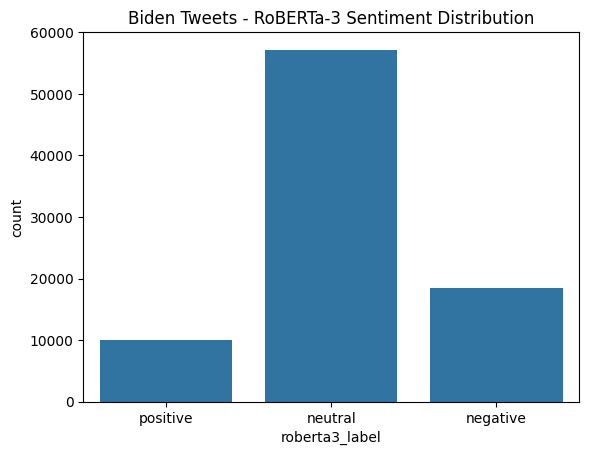

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_order = ['positive', 'neutral', 'negative']

biden_tweets['roberta3_label'] = pd.Categorical(biden_tweets['roberta3_label'], categories=sentiment_order, ordered=True)

sns.countplot(x='roberta3_label', data=biden_tweets, order = sentiment_order)
plt.title("Biden Tweets - RoBERTa-3 Sentiment Distribution")
plt.show()


###  Data Preparation for ML Model Training

In [25]:
trump_tweets_roberta['candidate'] = 'Trump'
trump_tweets_roberta = trump_tweets_roberta.drop("tweet", axis=1)
biden_tweets['candidate'] = 'Biden'
biden_tweets = biden_tweets.drop("tweet", axis = 1)

df_all = pd.concat([trump_tweets_roberta, biden_tweets], ignore_index=True)

df_all = df_all[['cleantext', 'roberta3_label', 'candidate']].dropna()
df_all = df_all.rename(columns={'cleantext': 'text', 'roberta3_label': 'label'})

In [26]:
df_all.to_csv("final.csv", index=False)

In [27]:
df_all

,text,label,candidate
0,trump student used hear year ten year heard ch...,neutral,Trump
1,get tie get tie trump rally iowa,neutral,Trump
2,2020 nypost censorship censored twitter manipu...,negative,Trump
3,trump presidenttrump trump2020landslidevictory...,neutral,Trump
4,trump nobody like tell farmer better way worki...,negative,Trump
...,...,...,...
182375,biden image santa maria ca wethepeoplehavespok...,neutral,Biden
182376,criticalracetheory become ubiquitous bidenharr...,neutral,Biden
182377,moving near biden,neutral,Biden
182378,election 2020elections trump biden,neutral,Biden


In [28]:
sample_bad = df_all.sample(n=10, random_state=42)[["text","label"]]
print(sample_bad.to_string(index=False))

                                                                                                                                                                                                                                                   text    label
                                      house celebration always call cake today honor joe bidens historic presidential victory making blue velvet cake blue tongue pic coming soon whats favorite cake joebiden bidenharris bluewave loveislove lovewins positive
                                                                                                                                                                      biden took lead georgia election election2020 elections2020 bidenharris2020 biden  neutral
                                                                                                                                                                                                                                biden

In [ ]:
df_all = pd.read_csv("final.csv")

## ML Model training

In [29]:
from sklearn.model_selection import train_test_split

X = df_all['text']
y = df_all['label']  # positive, neutral, negative

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Use same X_train_vec, X_test_vec, y_train, y_test from TF-IDF step
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))



===== Logistic Regression =====
              precision    recall  f1-score   support

    negative       0.84      0.76      0.80     12094
     neutral       0.83      0.90      0.87     21354
    positive       0.79      0.58      0.67      3028

    accuracy                           0.83     36476
   macro avg       0.82      0.75      0.78     36476
weighted avg       0.83      0.83      0.83     36476


===== Naive Bayes =====
              precision    recall  f1-score   support

    negative       0.74      0.73      0.74     12094
     neutral       0.79      0.86      0.82     21354
    positive       0.83      0.29      0.43      3028

    accuracy                           0.77     36476
   macro avg       0.79      0.63      0.66     36476
weighted avg       0.77      0.77      0.76     36476


===== Linear SVM =====
              precision    recall  f1-score   support

    negative       0.83      0.77      0.80     12094
     neutral       0.83      0.90      0.86    

### Based on the basic model training, it is found out that Logistics Regression & Linear SVM is the most effective among the other models, so hyperparameter tuning will be done with these two ML models

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid_svm = {
    'C' : [0.01, 0.1, 1, 10], # regularizatoin strength
    'loss' : ['hinge', 'squared_hinge']
}

grid_svm = GridSearchCV(LinearSVC(max_iter=10000), param_grid_svm, cv =3, scoring = 'f1_macro')
grid_svm.fit(X_train_vec, y_train)

print("Best SVM Params:", grid_svm.best_params_)

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Best SVM Params: {'C': 10, 'loss': 'hinge'}


c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [33]:
svm_model = LinearSVC(C=10, loss= 'hinge', max_iter=10000)
svm_model.fit(X_train_vec, y_train)

y_pred = svm_model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



              precision    recall  f1-score   support

    negative       0.83      0.77      0.80     12094
     neutral       0.84      0.89      0.87     21354
    positive       0.77      0.62      0.69      3028

    accuracy                           0.83     36476
   macro avg       0.81      0.76      0.78     36476
weighted avg       0.83      0.83      0.83     36476



In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C' : [0.01, 0.1, 1, 10], # regularizatoin strength
    'penalty' : ['l2', 'elasticnet', 'l1'],
    'solver' : ['lbfgs','liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='f1_macro')
grid_lr.fit(X_train_vec, y_train)

print("Best SVM Params:", grid_lr.best_params_)

c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sjiaj\AppData\Local\anaconda3\envs\nlp-lab\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjiaj\AppData\Local\

Best SVM Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [35]:
lr_model = LogisticRegression(C=10, penalty= 'l2', solver='lbfgs' ,max_iter=10000)
lr_model.fit(X_train_vec, y_train)

y_pred = lr_model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.77      0.80     12094
     neutral       0.84      0.90      0.87     21354
    positive       0.78      0.63      0.70      3028

    accuracy                           0.83     36476
   macro avg       0.82      0.77      0.79     36476
weighted avg       0.83      0.83      0.83     36476



In [38]:
df_all['ml_pred'] = lr_model.predict(vectorizer.transform(df_all['text']))

In [37]:
df_sentiment_by_candidate = df_all.groupby(['candidate', 'ml_pred']).size().unstack().fillna(0)

# Convert to percentages
df_sentiment_by_candidate_pct = df_sentiment_by_candidate.div(df_sentiment_by_candidate.sum(axis=1), axis=0) * 100

print(df_sentiment_by_candidate_pct)


ml_pred     negative    neutral  positive
candidate                                
Biden      19.467345  71.950466  8.582190
Trump      40.576065  55.337867  4.086068


## Bert-style Transformer Model Approach

In [9]:
import pandas as pd
df_all = pd.read_csv("final.csv")
df_all = df_all.dropna(subset=["text"])

In [35]:
df_all[df_all['candidate'] == 'Biden']['label'].value_counts()


label
neutral     57201
negative    18485
positive    10073
Name: count, dtype: int64

In [10]:
label2id = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {v: k for k, v in label2id.items()}

In [11]:
df_all["label_id"] = df_all["label"].map(label2id)

df_all[["text", "label", "label_id"]].head()

,text,label,label_id
0,trump student used hear year ten year heard ch...,neutral,1
1,get tie get tie trump rally iowa,neutral,1
2,2020 nypost censorship censored twitter manipu...,negative,0
3,trump presidenttrump trump2020landslidevictory...,neutral,1
4,trump nobody like tell farmer better way worki...,negative,0


In [12]:
df_all['label'].value_counts()

label
neutral     106873
negative     60242
positive     15264
Name: count, dtype: int64

In [13]:
from datasets import Dataset, Features, ClassLabel, Value

features = Features({
    "text": Value("string"),
    "label": ClassLabel(names=["negative", "neutral", "positive"])
})

# Only keep the columns we need for training:
hf_dataset = Dataset.from_pandas(
    df_all[["text", "label_id"]].rename(columns={"label_id": "label"}),
    features = features,
    preserve_index=False
)

# At this point, hf_dataset has two fields: "text" and "label" (ints in {0,1,2}).
hf_dataset = hf_dataset.shuffle(seed=42)  


In [14]:
hf_splits = hf_dataset.train_test_split(
    test_size=0.20, 
    stratify_by_column="label", 
    seed=42
)

train_dataset = hf_splits ["train"] 
test_dataset  = hf_splits ["test"]  

print(f" Train size: {len(train_dataset)}")
print(f" Test size:  {len(test_dataset)}")

 Train size: 145903
 Test size:  36476


In [15]:
print(train_dataset.column_names)
print(train_dataset.features)   # also shows datatype / nested structure

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'neutral', 'positive'], id=None)}


In [17]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_batch(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=64,
    )
# Apply to both splits. `remove_columns=["text"]` drops the raw text afterward.
train_tokenized = train_dataset.map(
    tokenize_batch, batched=True, remove_columns=["text"]
)
test_tokenized = test_dataset.map(
    tokenize_batch, batched=True, remove_columns=["text"]
)


Map: 100%|██████████| 36476/36476 [00:02<00:00, 15389.13 examples/s]


In [18]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="weighted"
    )
    acc = accuracy_score(labels, preds)
    return {
        "accuracy":          acc,
        "precision_weighted": precision,
        "recall_weighted":    recall,
        "f1_weighted":        f1,
    }


In [20]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    output_dir="./bert-fine-tune-output",            
    per_device_train_batch_size=8,    # if you run out of GPU memory, lower to 8 or 4
    per_device_eval_batch_size=16,
    num_train_epochs=3,               # 2–4 epochs is a typical range
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=200,    # logs every 200 steps
    save_steps=1000
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,     # you can also create a separate validation set, but using test here is okay
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # omit if you didn’t define it
)


C:\Users\sjiaj\AppData\Local\Temp\ipykernel_25456\3781665912.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [21]:
import torch
print("Torch CUDA available? ", torch.cuda.is_available())
print("Number of GPUs:      ", torch.cuda.device_count())
print("CUDA device name:    ", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


Torch CUDA available?  True
Number of GPUs:       1
CUDA device name:     NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [22]:
trainer.train()

metrics = trainer.evaluate(eval_dataset=test_tokenized)
print("Test metrics (HF Trainer):", metrics)

Step,Training Loss
200,0.708700
400,0.558000
600,0.478500
800,0.463500
1000,0.456900
1200,0.414300
1400,0.428700
1600,0.373500
1800,0.449200
2000,0.402000


Test metrics (HF Trainer): {'eval_loss': 0.45900580286979675, 'eval_accuracy': 0.9173977409803706, 'eval_precision_weighted': 0.9180585426571474, 'eval_recall_weighted': 0.9173977409803706, 'eval_f1_weighted': 0.9175577486355607, 'eval_runtime': 144.4753, 'eval_samples_per_second': 252.472, 'eval_steps_per_second': 15.781, 'epoch': 3.0}


In [23]:
from sklearn.metrics import classification_report
import numpy as np

preds_output = trainer.predict(test_tokenized)
logits, labels = preds_output.predictions, preds_output.label_ids
preds = np.argmax(logits, axis=-1)

preds_str  = [id2label[p] for p in preds]
labels_str = [id2label[l] for l in labels]

print(classification_report(
    labels_str,
    preds_str,
    labels=["positive","neutral","negative"],
    digits=4
))


              precision    recall  f1-score   support

    positive     0.8527    0.8667    0.8596      3053
     neutral     0.9404    0.9191    0.9296     21375
    negative     0.8950    0.9272    0.9108     12048

    accuracy                         0.9174     36476
   macro avg     0.8960    0.9043    0.9000     36476
weighted avg     0.9181    0.9174    0.9176     36476



### Future Work